# Cleaning CC data

This python notebook operates on a csv created after editing in open refine and is designed to finish cleaning columns of interest which were easier to clean in python.

## Setting up Python

Here we import necessary packages. 
This chunk may take a while.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
%matplotlib notebook

# increase print limit
pd.options.display.max_rows = 99999

## Functions necessary for this notebook

In [2]:
# import pandas as pd
def report_pattern (x , pattern , col,return_type):
    """searches a pandas series for a regex expression, pattern, and replaces with replacement"""
   
    res = print('{}:\ntoe pattern {}:{}'.format(return_type,str(pattern),(x[col].str.match(pattern)==True).sum())) 
    
    return res

In [3]:
# import pandas as pd
#needs to capture when an entires fits multiple patterns and which patterns those are
def label_pattern (x , pat_num , pattern, pat_col = 'toe_pattern' , col = 'toes'):
    """searches a pandas series for a regex expression, pattern, and replaces with replacement"""
#     label the pattern
    x.loc[(x[col].str.match(pattern)==True)&(x[pat_col].isnull()),pat_col] = str(pat_num)
    return x
    

In [4]:
# import pandas as pd
def make_str(x):
    assert isinstance(x,pd.Series)
    #convert series to string
    x = x.astype(str)
    #create an index of single-digit numbers
    idx = x.str.len()<2
    #add a zero to the beginning of those single-digit numbers
    x.loc[idx] = '0' + x.loc[idx]
    return x

In [5]:
# import pandas as pd
def replace_pattern (x , pattern , pattern_b , source_col , replacement):
    """searches a pandas series for a regex expression, pattern, and replaces with replacement"""
    
    return x.loc[x[source_col].str.match(pattern)==True,source_col].str.replace(pattern_b,replacement)


### Use this chunk to read data from local folder on Chris' machine

In [6]:
# Source Data
sourceDataPers = 'C:/Users/Christopher/Google Drive/TailDemography/outputFiles'
sourceDataBig = 'S:/Chris/TailDemography/combined data'

#Output Data paths
outputPers = 'C:/Users/Christopher/Google Drive/TailDemography/outputFiles'
outputBig = 'S:/Chris/TailDemography/data'


In [7]:
os.chdir(sourceDataBig)
# os.listdir()
df=pd.read_csv('mapped-data-all_18-01-08_post_openrefine.csv')
df.head()


,species,toes,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,review_painted,review_new.recap,review_rtl,forceMale,forceFemale,forceRecap,forceNew,forceSighting,drop_species,drop_morphometrics
0,j,1-13-19,2000-03-17T00:00:00Z,f,52.0,74.0,0,4.2,r1c,1falls,...,False,False,False,False,False,False,False,False,False,False
1,j,1-13-20,2000-03-17T00:00:00Z,m,56.0,77.0,0,5.6,r2c,1falls,...,False,False,False,False,False,False,False,False,False,False
2,j,1-14-19,2000-03-17T00:00:00Z,f,57.0,81.0,0,6.6,r3c,wall on rt side v wall at pine xing,...,False,False,False,False,False,False,False,False,False,False
3,j,1-14-20,2000-03-17T00:00:00Z,f,57.0,79.0,0,5.5,r4c,wall on rt side v wall at pine xing,...,False,False,False,False,False,False,False,False,False,False
4,j,3-8,2000-03-17T00:00:00Z,f,82.0,89.0,27,17,r5c,oak across from bottom wall at pine xing,...,False,False,False,False,False,False,False,False,False,False


Let's take a look at the data

In [8]:
print("\nThere are {} data points in our data set.".format(df.shape[0]))


There are 8197 data points in our data set.


In [9]:
print("\nThe columns in the data have the following data types:\n{}".format(df.dtypes))


The columns in the data have the following data types:
species                object
toes                   object
date                   object
sex                    object
svl                   float64
tl                    float64
rtl_orig               object
mass                   object
paint.mark             object
location               object
meters                 object
new.recap              object
painted                object
misc                   object
vial                   object
year                    int64
rtl                   float64
autotomized              bool
new.recap_orig         object
sighting               object
review_sex               bool
review_species           bool
review_painted           bool
review_new.recap         bool
review_rtl               bool
forceMale                bool
forceFemale              bool
forceRecap               bool
forceNew                 bool
forceSighting            bool
drop_species             bool
drop_morphomet

## Correcting class of columns

In [10]:
#We need to add real error handling into these conversion chunks

##Convert integer columns to int
intCols = ['meters','year']
df[intCols]=df[intCols].astype(int,errors='ignore')

##Convert numeric columns to numeric
numCols = ['svl','tl','rtl','rtl_orig','mass']
df[numCols]=df[numCols].apply(pd.to_numeric,errors='coerce')

##Convert string columns to str
strCols = ['toes','sex','species','vial']
df[strCols]=df[strCols].astype(str, errors='ignore')

#Convert date to datetime
df.loc[df.date=="NA"]=np.nan
df.date = pd.to_datetime(df.date,errors='coerce')

##Convert bool columns to bool
boolCols = ['review_sex','review_species','review_painted','review_new.recap',\
            'review_rtl','forceMale','forceFemale','forceRecap','forceNew',\
            'forceSighting','drop_species','drop_morphometrics','autotomized']
df[boolCols]=df[boolCols].astype(bool, errors='ignore')

In [11]:
print("\nAfter applying the above changes, the data types re as follows:\n{}".format(df.dtypes))


After applying the above changes, the data types re as follows:
species                       object
toes                          object
date                  datetime64[ns]
sex                           object
svl                          float64
tl                           float64
rtl_orig                     float64
mass                         float64
paint.mark                    object
location                      object
meters                        object
new.recap                     object
painted                       object
misc                          object
vial                          object
year                         float64
rtl                          float64
autotomized                     bool
new.recap_orig                object
sighting                      object
review_sex                      bool
review_species                  bool
review_painted                  bool
review_new.recap                bool
review_rtl                      bool
forceMale 

## Remove leading and trailing whitespaces

for col in df:
    print(len(col))# returns unique lengths of sex
    col=col.strip()

for col in df:
    col=col.strip()

## Cleaning toes column

First we will rename "toes" to "toes_orig"

In [12]:
df = df.rename(columns = {'toes':'toes_orig'},index = str)

Next we create a new column, "toes"  for the renamed toes

In [13]:
df['toes'] = df.toes_orig

Now we attempt to identify problem toes name and correct or export for review.

In [14]:
pattern1 = ".( {1,}-.|.- {1,}.)" # toes entries with any number of spaces on either side of a hyphen
pattern2 = ".( {,}\w{,} {1,})." # toes entries with space around or between numbers <- the spaces here should be deleted
pattern3 = ".(')."
pattern4 = "./."  # entries with '/' <-- need to replace these with '-'
pattern5 = "(\?{1,})"#<-- these needs to be investigated
pattern6 = "^\d{3,}$" # entries consist of only a single number comprised of at least three digits 
#<-- these needs to be investigated by checking raw field notes
pattern7 = ".(-{2,})." # entries which have at least 2 consecutive '-' <- these should be investigated
pattern8 = "^0" # entries in which single digit numbers have a leading "0" <-- Check raw field notes on this too
pattern9 = "a\w" #<--handled hyphens should be inserted  between the [ab] and \w 
# entries that contain an 'a' or 'b' followed by any character in the set [a-zA-Z0-9_]
pattern10 = "b\w" #<--handled hyphens should be inserted  between the [ab] and \w 
pattern11 = "\wa" # entries that contain an 'a' or 'b' preceded by any character in the set [a-zA-Z0-9_]
pattern12 = "\wb" # entries that contain an 'a' or 'b' preceded by any character in the set [a-zA-Z0-9_]
pattern13 = "[()]"
# remove space before 'a' at end of toes
#investigate '\d-', 
#'-(*)-', 
#' (16) ', 
#'---', <- may not exist in raw data
#'\d- ', 
#'- \d', 
#transcription errors from excel (toes in date format,
#'-\d\d\d\d' <- may not be in the data set

We'll have to change this block if we add or remove toe patterns.
This is not ideal and needs to be fixed

In [15]:
toe_pattern = pd.Series([*range(1,14)]) 
toe_pattern = make_str(toe_pattern)
print(toe_pattern)

toe_pattern_descr = pd.Series([pattern1,pattern2,pattern3,pattern4
                               ,pattern5,pattern6,pattern7,pattern8
                               ,pattern9,pattern10,pattern11,pattern12,pattern13])
toe_pattern_descr = toe_pattern_descr.astype(str)
print(toe_pattern_descr)

toe_pattern_reference = pd.DataFrame({'toe_pattern': toe_pattern,'description':toe_pattern_descr})
toe_pattern_reference

0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
12    13
dtype: object
0     .( {1,}-.|.- {1,}.)
1      .( {,}\w{,} {1,}).
2                   .(').
3                     ./.
4                (\?{1,})
5                ^\d{3,}$
6               .(-{2,}).
7                      ^0
8                     a\w
9                     b\w
10                    \wa
11                    \wb
12                   [()]
dtype: object


,toe_pattern,description
0,01,".( {1,}-.|.- {1,}.)"
1,02,".( {,}\w{,} {1,})."
2,03,.(').
3,04,./.
4,05,"(\?{1,})"
5,06,"^\d{3,}$"
6,07,".(-{2,})."
7,08,^0
8,09,a\w
9,10,b\w


We first replace the string 'nan' with a null value

In [16]:
df.loc[df.toes=='nan','toes'] = np.nan

Let's see how many of these patterns we need to correct

In [17]:
df['toe_pattern'] = np.nan

Here we use a for-loop to label the patterns 
(there's probably a better way to do this with pandas map or apply, but I'll have to figure this out, for now this is fast enough, but it could make a difference with a larger data set or with more patterns)

In [18]:
for i in range(0,toe_pattern_reference.shape[0]):
    tmp_pat_num = toe_pattern_reference.iloc[i,0]
    tmp_pattern = toe_pattern_reference.iloc[i,1]
    df = label_pattern(df,tmp_pat_num,tmp_pattern,'toe_pattern','toes')

A quick summary of the number of observations for each pattern in the data set

In [19]:
toe_errors =df.toe_pattern.value_counts(dropna=False).reset_index()\
.rename(columns = {'index':'toe_pattern','toe_pattern':'observations'})
toe_errors.loc[toe_errors.toe_pattern.isnull(),'toe_pattern'] = 'Not covered by current patterns'
toe_errors_desc = toe_errors.merge(toe_pattern_reference,'left',on='toe_pattern')
toe_errors_desc

,toe_pattern,observations,description
0,Not covered by current patterns,7891,NaN
1,02,252,".( {,}\w{,} {1,})."
2,01,40,".( {1,}-.|.- {1,}.)"
3,05,7,"(\?{1,})"
4,06,3,"^\d{3,}$"
5,09,1,a\w
6,08,1,^0
7,04,1,./.
8,13,1,[()]


Now let's make sure we've accounted for every row in the data set

In [20]:
accountedRows = toe_errors.observations.sum()
totalRows = df.shape[0]
notAccountedRows = df.shape[0] - toe_errors.observations.sum()
print("\nThere are {} rows accounted for in the patterns (including null values) and there {} rows in the full data set.\
  There are {} rows unaccounted for.".format(accountedRows,totalRows,notAccountedRows))


There are 8197 rows accounted for in the patterns (including null values) and there 8197 rows in the full data set.  There are 0 rows unaccounted for.


### And now we correct these patterns
We'll preserve the original toe data in a column called "toes_orig" just in case.  We can drop this later, if we are comfortable with the changes.  The new toes will be labeled "toes".

In [21]:
corrections_config = {'01':{'action':'replace','pattern_b':" ",'replacement':"\"\""},
            '02':{'action':'replace','pattern_b':" ",'replacement':"-"},
            '03':{'action':'replace','pattern_b':"\'",'replacement':"\"\""},
            '04':{'action':'replace','pattern_b':"/",'replacement':"-"},
            '05':{'action':'save','pattern_b':np.nan,'replacement':np.nan},
            '06':{'action':'save','pattern_b':np.nan,'replacement':np.nan},
            '07':{'action':'save','pattern_b':np.nan,'replacement':np.nan},
            '08':{'action':'replace','pattern_b':"^0",'replacement':"\"\""},
            '09':{'action':'replace','pattern_b':'a','replacement':'-a'},
            '10':{'action':'replace','pattern_b':'b','replacement':'-b'},          
            '11':{'action':'replace','pattern_b':"a",'replacement':"a-"},
            '12':{'action':'replace','pattern_b':"b",'replacement':"b-"},
            '13':{'action':'replace','pattern_b':"[()]",'replacement':"\"\""}}

In [22]:
toe_errors_desc['action'] = toe_errors_desc.loc[toe_errors_desc.toe_pattern.str.len()==2].toe_pattern\
.map(lambda x: corrections_config[x]['action'],na_action='ignore')

toe_errors_desc['replacement'] = toe_errors_desc.loc[toe_errors_desc.toe_pattern.str.len()==2].toe_pattern\
.map(lambda x: corrections_config[x]['replacement'],na_action='ignore')

toe_errors_desc = toe_errors_desc.sort_values('toe_pattern').reset_index(drop=True)
toe_errors_desc

,toe_pattern,observations,description,action,replacement
0,01,40,".( {1,}-.|.- {1,}.)",replace,""""""
1,02,252,".( {,}\w{,} {1,}).",replace,-
2,04,1,./.,replace,-
3,05,7,"(\?{1,})",save,NaN
4,06,3,"^\d{3,}$",save,NaN
5,08,1,^0,replace,""""""
6,09,1,a\w,replace,-a
7,13,1,[()],replace,""""""
8,Not covered by current patterns,7891,NaN,NaN,NaN


In [23]:
help(replace_pattern)

Help on function replace_pattern in module __main__:

replace_pattern(x, pattern, pattern_b, source_col, replacement)
    searches a pandas series for a regex expression, pattern, and replaces with replacement



In [24]:
for i in range(0,toe_errors_desc.shape[0]):
    tmp_pat_num = toe_errors_desc.iloc[i,0]
    tmp_pattern = toe_errors_desc.iloc[i,2]
    action = toe_errors_desc.iloc[i,3]
    tmp_replacement = toe_errors_desc.iloc[i,4]
    tmp_x = df.loc[df.toe_pattern==tmp_pat_num,:]
    
    if action =='save':
        tmp_filename = 'pattern'+tmp_pat_num+'.csv'
        tmp_x.to_csv(tmp_filename)
        print("Pattern {} successfully saved to {}.".format(tmp_pattern,tmp_filename))
    if action =='replace':
        df.loc[df.toe_pattern==tmp_pat_num,'toes'] = replace_pattern(x=df.loc[df.toe_pattern==tmp_pat_num]
                                                                     ,pattern = tmp_pat_num
                                                                     ,pattern_b = tmp_pattern
                                                                     ,source_col = 'toes'
                                                                    ,replacement = tmp_replacement)
        print("Pattern {} successfully replaced with {}.".format(tmp_pattern,tmp_replacement))
    else:
        print("No direction provided for pattern {}.  No action was taken.".format(tmp_pattern))

Pattern .( {1,}-.|.- {1,}.) successfully replaced with "".
Pattern .( {,}\w{,} {1,}). successfully replaced with -.
Pattern ./. successfully replaced with -.
Pattern (\?{1,}) successfully saved to pattern05.csv.
No direction provided for pattern (\?{1,}).  No action was taken.
Pattern ^\d{3,}$ successfully saved to pattern06.csv.
No direction provided for pattern ^\d{3,}$.  No action was taken.
Pattern ^0 successfully replaced with "".
Pattern a\w successfully replaced with -a.
Pattern [()] successfully replaced with "".
No direction provided for pattern nan.  No action was taken.


### Now we confirm that the patterns we expect to have eliminated have indeed been eliminated from the data set

In [25]:
for i in range(0,toe_pattern_reference.shape[0]):
    tmp_pattern = str(toe_pattern_reference.iloc[i,1])
    report_pattern(df,tmp_pattern,'toes','Post-Correction')

Post-Correction:
toe pattern .( {1,}-.|.- {1,}.):0
Post-Correction:
toe pattern .( {,}\w{,} {1,}).:0
Post-Correction:
toe pattern .(').:0
Post-Correction:
toe pattern ./.:0
Post-Correction:
toe pattern (\?{1,}):7
Post-Correction:
toe pattern ^\d{3,}$:3
Post-Correction:
toe pattern .(-{2,}).:0
Post-Correction:
toe pattern ^0:0
Post-Correction:
toe pattern a\w:0
Post-Correction:
toe pattern b\w:0
Post-Correction:
toe pattern \wa:0
Post-Correction:
toe pattern \wb:0
Post-Correction:
toe pattern [()]:0


## Cleaning Sex column

In [26]:
print(df.sex.str.len().unique())# returns unique lengths of sex
df.sex=df.sex.str.strip()
print(df.sex.str.len().unique())

[1 3 2 5]
[1 3 2 5]


### Identify non "m" or "f" values and their frequencies

In [27]:
patterns_sex="m|f|NA"
non_matches=df.sex.loc[df.sex.str.match(patterns_sex)!=True]
print("\nThere are {} entries for sex which do not match the patterns {}:"\
      .format(non_matches.shape[0],patterns_sex.split("|")))
non_matches.value_counts()


There are 5412 entries for sex which do not match the patterns ['m', 'f', 'NA']:


nan      5255
juv       128
?          16
?f          6
n           2
adult       1
???         1
unm         1
?m          1
[m]         1
Name: sex, dtype: int64

### Identify values to convert to NA, m, or f

In [28]:
sex2NA=['adult','juv','nan']
sex2m=['unm']
df.loc[df.sex.isin(sex2NA)==True]
print(df.sex.loc[df.sex.isin(sex2NA)==True].count())
print(df.sex.loc[df.sex.isin(sex2m)==True].count())

5384
1


### Convert the values to NA or m, respectively.

In [29]:
df.loc[df.sex.isin(sex2m)]

,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,review_rtl,forceMale,forceFemale,forceRecap,forceNew,forceSighting,drop_species,drop_morphometrics,toes,toe_pattern
7726,up,nan,2017-07-20,unm,NaN,NaN,NaN,NaN,NaN,3m above sb on rt side 4m ^ CC/CCC,...,False,False,False,False,False,False,True,True,NaN,NaN


In [30]:
df.loc[df.sex.isin(sex2NA),'sex']=np.nan
df.loc[df.sex.isin(sex2m),'sex']='m'
print(df.sex.loc[df.sex.isin(sex2NA)==True].count())
print(df.sex.loc[df.sex.isin(sex2m)==True].count())

0
0


# Set all remaining species and sex with "?" to NaN

In [31]:
df.loc[(df.species.str.contains('\?')) & (df.species.notnull()),'species'] = np.nan
df.loc[(df.sex.str.contains('\?')) & (df.sex.notnull()),'sex'] = np.nan

# Cleaning autotmized column

In [32]:
autotomyDict = {False:'intact',True:'autotomized'}

df.loc[:,'autotomized'] = df.loc[:,'autotomized'].map(autotomyDict)
df.autotomized.unique()

array(['intact', 'autotomized'], dtype=object)

# Cleaning new.recap column

In [33]:
df.head()

,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,review_rtl,forceMale,forceFemale,forceRecap,forceNew,forceSighting,drop_species,drop_morphometrics,toes,toe_pattern
0,j,1-13-19,2000-03-17,f,52.0,74.0,0.0,4.2,r1c,1falls,...,False,False,False,False,False,False,False,False,1-13-19,NaN
1,j,1-13-20,2000-03-17,m,56.0,77.0,0.0,5.6,r2c,1falls,...,False,False,False,False,False,False,False,False,1-13-20,NaN
2,j,1-14-19,2000-03-17,f,57.0,81.0,0.0,6.6,r3c,wall on rt side v wall at pine xing,...,False,False,False,False,False,False,False,False,1-14-19,NaN
3,j,1-14-20,2000-03-17,f,57.0,79.0,0.0,5.5,r4c,wall on rt side v wall at pine xing,...,False,False,False,False,False,False,False,False,1-14-20,NaN
4,j,3-8,2000-03-17,f,82.0,89.0,27.0,17.0,r5c,oak across from bottom wall at pine xing,...,False,False,False,False,False,False,False,False,3-8,NaN


In [34]:
#try using a dict to do thing more efficiently
newRecapKeep = ['recap', 'new', 'r', 'n']
new = ['new','n']
recap = ['recap','r']
df.loc[~df['new.recap'].isin(newRecapKeep),'new.recap'] = np.nan
df.loc[df['new.recap'].isin(new),'new.recap'] = 'new'
df.loc[df['new.recap'].isin(recap),'new.recap'] = 'recap'

## Add Columns

In [35]:
# tl_svl and mass_svl
df['tl_svl']=(df.tl/df.svl)
df['mass_svl']=(df.mass/df.svl)

## Create function to generate lizardNumber 
 lizard number is a numeric identifier of unique animals in the data set
function takes the following arguments:
    - *x*: series object on which function acts on
    - *sortCriteria*: list of strings of column names on which to sort data.  data are sorted by columns from left to right
    - *validationCriteria*: dictionary of dictionaries that identify columns to validate and validation expression of the form {{'column':'column_2 >= column_1'},{'otherColumn':'column_2 >= column_1'}}
    - *result*: dictionary of of dictionaries detailing the value *x* takes if validations are True or False of the form: {{'True':x=x[i]},{'False':x=x[i]+1},{errors: 'raise'}}, errors may be 'raise' *default* (terminates function and returns an error) or 'ignore' (returns 'NA')
Function action:
- first sort data by species, toes, then date

- for time points 1 and , with 2 being later: 
    - toes2 == toes1
    - svl2-svl1 >=-2
    - year2-year1 <=7
    - for species ==j:
        - if svl >=56:
            - if sex2==sex1:
                lizardNumber[i+1]=lizardNumber[i]
          else:
            - lizardNumber[i+1]=lizardNumber[i]+1

In [36]:
import pandas as pd
import os

sortCriteria = ['species','toes', 'sex']
validation = ['date','svl']


def lizsort(x,path:str,sortCriteria = ['species','toes', 'sex'], validation = ['date','svl'],\
            unsortablefile ='unsortable.csv'):
    """
    takes a pandas data frame and returns a pandas dataframe with only those values which 
    can be evaluated according to given criteria and prints a summaryof the files evaluated
    :param path:
    :param sortCriteria:
    :param validation:
    :param unsortablefile:
    """
    #identify lizards with sufficient data to evaluate
    #report on those without sufficient data and save them to a file for later evaluation
    critical = sortCriteria +validation
    unsortable = x.loc[x.loc[:,critical].isnull().any(axis=1)]
    sortable = x.loc[x.loc[:,critical].notnull().all(axis=1)]
    os.chdir(path)
    unsortable.to_csv(unsortablefile)
    print("\nThere were {} entries for which values for one of the critical criteria, ({}), were null.  \
    These entries could not be evaluated and were written out to the file {} for evaluation."\
          .format(unsortable.shape[0],critical,unsortablefile))
    return sortable

def mindate(x, sortCriteria = ['species','toes', 'sex']): # finds date of the initial capture of an animal
    """
    takes a pandas data frame and returns a dataframe with sorting criteria adds a column containing the earliest date 
    at which each unique combination of the sort criteria was sighted. [Requires that the source dataframe,x, has a 
    column labeled 'date'.]
    """
    if any(x.columns=='initialCaptureDate'):
        x = tmp_sort['n_val_data'].drop('initialCaptureDate',1)
    sortable_min_date =pd.DataFrame(x.groupby(sortCriteria).date.min()).\
    rename(index = str, columns= {'date':'initialCaptureDate'}).reset_index()
    x = x.merge(sortable_min_date,how = 'left', on = sortCriteria)
    x['year_diff'] = x.date.dt.year - x.initialCaptureDate.dt.year
    return x

def smallest(x, svlGroup = ['species','toes', 'sex','initialCaptureDate']):#finds svl of animal at date of the initial capture.  needs to be moved out of function
    if any(x.columns=='smallest_svl'):
        x = x.drop('smallest_svl',1)
    sortable_smallest_svl =x.groupby(svlGroup).svl.min().reset_index()\
    .rename(index = str, columns= {'svl':'smallest_svl'})
    #sortable_smallest_svl
    x = x.merge(sortable_smallest_svl,how = 'left', on = svlGroup)
    x['svl_diff'] = x.svl - x.smallest_svl
    return x

def validate (x, sortCriteria = ['species','toes', 'sex'],validation = ['date','svl']):
    x['tmp'] = 1 
    numbers = x.loc[(x.year_diff<=7) & (x.svl_diff>=-2),:].\
    groupby(['species','sex','toes']).tmp.min().cumsum().reset_index()
    validated = x.loc[(x.year_diff<=7) & (x.svl_diff>=-2),:].shape[0]
    not_val_data = x.loc[(x.year_diff<=7) & (x.svl_diff>=-2),:]
    not_validated = x.loc[~((x.year_diff<=7) & (x.svl_diff>=-2)),:].shape[0]
    numbers = numbers.rename(columns={'tmp':'liznumber'}) # rename last column to liznumber
    #the next line merges the numbers to the original data frame to assign the lizard number to the full record
    #of an animal.  It then drop 'tmp'and 'smallest_svl, sinc ewe won't be using these again
    x = x.merge(numbers,'left', on = ['species','sex','toes']).drop(['tmp','smallest_svl'],1)
    print("\nOf those entries we can handle, there are {} individuals as defined by {} which pass validataion based\
    on {} and {} which do not pass validation."\
          .format(validated,sortCriteria,validation,not_validated))
    return {'val_data':x,'n_val_data':not_val_data,'n_validated':not_validated}

def genliznum2(df, path:str, errors:str= 'raise'):
    """
    calls functions to generate a unique identifier for each lizard
    
    Lizard number is a numeric identifier of unique animals in the data set function takes the following arguments:
    :param df:  series object on which function acts on
    :param sortCriteria: list of strings of column names on which to sort data.  data are sorted by columns from left \
    to right
    :param validation: dictionary of dictionaries that identify columns to validate and validation expression of the form:\
     {{'column':'column_2 >= column_1'},{'otherColumn':'column_2 >= column_1'}}
    :param errors: str , errors may be 'raise' *default* (terminates function and returns an error) or 'ignore' (returns 'NA')
    :return: dataframe
    #dictionary  of dictionaries detailing the value *x* takes if validations are True or False of the form: \
    #{{'True':x=x[i]},{'False':x=x[i]+1},{errors: 'raise'}}
    """
    sortable = lizsort(df, path = path)
    sortable = mindate(sortable)
    sortable = smallest(sortable)
    tmp_sort = validate(sortable)
    sortable = tmp_sort['val_data']
    n_val = mindate(tmp_sort['n_val_data'])
    n_val = smallest(n_val)
    n_val = validate(n_val)['val_data']
 
    res = n_val
    return res


genliznum2(df, path = 'C:\\Users\\Christopher\\Documents\\GitHub\\tailDemography\\data')

### Initial attempt to assign lizard numbers

In [37]:
sortable = lizsort(df, path = 'S:\\Chris\\TailDemography\\data')
    
sortable = mindate(sortable)
sortable = smallest(sortable)
tmp_sort = validate(sortable)
sortable = tmp_sort['val_data']


There were 5877 entries for which values for one of the critical criteria, (['species', 'toes', 'sex', 'date', 'svl']), were null.      These entries could not be evaluated and were written out to the file unsortable.csv for evaluation.

Of those entries we can handle, there are 2240 individuals as defined by ['species', 'toes', 'sex'] which pass validataion based    on ['date', 'svl'] and 80 which do not pass validation.


### Second attempt to assign lizard numbers

In [38]:
n_val = mindate(tmp_sort['n_val_data'])
n_val = smallest(n_val)
df_numbered = validate(n_val)['val_data']


Of those entries we can handle, there are 2240 individuals as defined by ['species', 'toes', 'sex'] which pass validataion based    on ['date', 'svl'] and 0 which do not pass validation.


### Displaying the output data frame

In [39]:
df_numbered

,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,drop_species,drop_morphometrics,toes,toe_pattern,tl_svl,mass_svl,year_diff,svl_diff,initialCaptureDate,liznumber
0,j,1-13-19,2000-03-17,f,52.0,74.0,0.0,4.20,r1c,1falls,...,False,False,1-13-19,NaN,1.423077,0.080769,0,0.0,2000-03-17,37
1,j,1-13-20,2000-03-17,m,56.0,77.0,0.0,5.60,r2c,1falls,...,False,False,1-13-20,NaN,1.375000,0.100000,0,0.0,2000-03-17,512
2,j,1-14-19,2000-03-17,f,57.0,81.0,0.0,6.60,r3c,wall on rt side v wall at pine xing,...,False,False,1-14-19,NaN,1.421053,0.115789,0,0.0,2000-03-17,44
3,j,1-14-20,2000-03-17,f,57.0,79.0,0.0,5.50,r4c,wall on rt side v wall at pine xing,...,False,False,1-14-20,NaN,1.385965,0.096491,0,0.0,2000-03-17,45
4,j,3-8,2000-03-17,f,82.0,89.0,27.0,17.00,r5c,oak across from bottom wall at pine xing,...,False,False,3-8,NaN,1.085366,0.207317,0,0.0,2000-03-17,273
5,j,1-15-16,2000-03-17,m,58.0,64.0,24.0,5.50,r6c,sb half way up from bottom wall to pine xing,...,False,False,1-15-16,NaN,1.103448,0.094828,0,0.0,2000-03-17,518
6,j,1-18,2000-03-17,f,58.0,62.0,20.0,7.00,r7c,sb 3/4 way up from bottom wall to pine xing,...,False,False,1-18,NaN,1.068966,0.120690,0,0.0,2000-03-17,49
7,j,1-13-18,2000-03-17,f,54.0,75.0,0.0,5.50,r8c,sb at pine xing,...,False,False,1-13-18,NaN,1.388889,0.101852,0,0.0,2000-03-17,35
8,j,1-19,2000-03-17,m,62.0,84.0,0.0,7.50,r9c,sb 10m ^ root xing,...,False,False,1-19,NaN,1.354839,0.120968,0,0.0,2000-03-17,524
9,j,1-20,2000-03-17,f,60.0,80.0,0.0,8.00,r10c,sb at H3,...,False,False,1-20,NaN,1.333333,0.133333,0,33.0,2000-03-17,53


### QC of lizard numbers

Identify individuals that have same species and toes, but different sex for review

In [40]:
df = df.merge(df.groupby(['species','toes']).sex.nunique().reset_index().rename(columns = {'sex':'sex_count'})\
         ,how = 'inner', on = ['species','toes'])
print(df.loc[df.sex_count>1,:].shape[0])
df.loc[df.sex_count>1,:].to_csv('entries flagged with same species and toes diff sex.csv')
df.head()

456


,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,forceRecap,forceNew,forceSighting,drop_species,drop_morphometrics,toes,toe_pattern,tl_svl,mass_svl,sex_count
0,j,1-13-19,2000-03-17,f,52.0,74.0,0.0,4.2,r1c,1falls,...,False,False,False,False,False,1-13-19,NaN,1.423077,0.080769,1
1,j,1-13-19,2000-03-17,f,53.0,69.0,0.0,5.0,r18c,Rs opp slab,...,False,False,False,False,False,1-13-19,NaN,1.301887,0.094340,1
2,j,1-13-19,2000-06-24,f,63.0,93.0,0.0,6.7,o11a,halfway between 1 falls and cave trail,...,False,False,False,False,False,1-13-19,NaN,1.476190,0.106349,1
3,j,1-13-19,2001-07-13,f,79.0,108.0,0.0,14.6,r31a,15m ^ 1falls,...,False,False,False,False,False,1-13-19,NaN,1.367089,0.184810,1
4,j,1-13-19,2008-07-18,f,68.0,86.0,0.0,9.3,y11a.t,H3/H4,...,True,False,False,False,False,1-13-19,NaN,1.264706,0.136765,1


In [41]:
df.groupby(['species','toes']).sex.nunique()

species  toes                 
as       15                       0
         16                       0
cn ex    1-7                      1
         7                        1
j        1- 6 -14                 1
         1-10-11-16               1
         1-10-11-17               1
         1-10-11-18               1
         1-10-11-19               1
         1-10-11-20               1
         1-10-12-16               1
         1-10-12-17               1
         1-10-12-18               1
         1-10-12-19               1
         1-10-12-20               1
         1-10-13-15               1
         1-10-13-16               1
         1-10-13-18               2
         1-10-13-19               1
         1-10-13-20               2
         1-10-14-16               1
         1-10-14-17               1
         1-10-14-18               2
         1-10-14-19               1
         1-10-14-20               1
         1-10-15-16               1
         1-10-15-17              

In [42]:
print("Lizard Numbers in the sample range from {} to {}."\
      .format(df_numbered.liznumber.min(),df_numbered.liznumber.max()))

Lizard Numbers in the sample range from 1 to 1419.


In [43]:
possibleLizNum = set(range(int(df_numbered.liznumber.min()),int(df_numbered.liznumber.max())))
actualLizNum = set(pd.Series(df_numbered.liznumber.unique()).dropna().apply(int))
print("\nThere are {} entries.  There are {} unique lizard numbers.\
\n\nThe liznumber ranges from {} to {}."\
  .format(df_numbered.shape[0],len(df_numbered.liznumber.unique())\
          ,df_numbered.liznumber.min(),df_numbered.liznumber.max()))

missingLizNum = possibleLizNum - actualLizNum
if len(missingLizNum)>0:
    print("\n\nThe following numbers are not assigned to a lizard:\n{}"\
      .format(missingLizNum))
else:
    print("\n\nThere are no numbers which were not assigned.")


There are 2240 entries.  There are 1419 unique lizard numbers.

The liznumber ranges from 1 to 1419.


There are no numbers which were not assigned.


## Add additional columns
- *daysSinceCapture* [int]:identifies the number of days since the animal was captured
- *capture* [int]: identifies the number of times an animal has been captured prior to an entry

In [44]:
df_numbered.loc[:,'daysSinceCapture'] = (df_numbered.date - df_numbered.initialCaptureDate).dt.days


In [45]:
# need to QC this
df_numbered['capture'] = df_numbered.sort_values(['liznumber','date'])\
.groupby(['liznumber']).daysSinceCapture.cumcount()+1

In [46]:
print(df_numbered.groupby('capture').capture.count())

capture
1    1419
2     472
3     200
4      84
5      39
6      16
7       7
8       3
Name: capture, dtype: int64


<IPython.core.display.Javascript object>


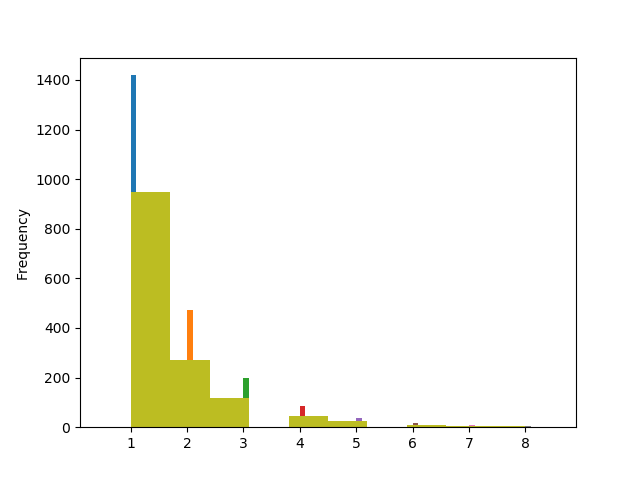

capture
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
6    AxesSubplot(0.125,0.11;0.775x0.77)
7    AxesSubplot(0.125,0.11;0.775x0.77)
8    AxesSubplot(0.125,0.11;0.775x0.77)
Name: capture, dtype: object

In [47]:
df_numbered.groupby('capture').capture.hist() # move this figure to R ggplot2

In [48]:
df_numbered.groupby('liznumber').capture.max().plot.hist()

## QC of Capture number and Recap status

In [49]:
df_numbered.columns

Index(['species', 'toes_orig', 'date', 'sex', 'svl', 'tl', 'rtl_orig', 'mass',
       'paint.mark', 'location', 'meters', 'new.recap', 'painted', 'misc',
       'vial', 'year', 'rtl', 'autotomized', 'new.recap_orig', 'sighting',
       'review_sex', 'review_species', 'review_painted', 'review_new.recap',
       'review_rtl', 'forceMale', 'forceFemale', 'forceRecap', 'forceNew',
       'forceSighting', 'drop_species', 'drop_morphometrics', 'toes',
       'toe_pattern', 'tl_svl', 'mass_svl', 'year_diff', 'svl_diff',
       'initialCaptureDate', 'liznumber', 'daysSinceCapture', 'capture'],
      dtype='object')

In [50]:
recapQuestion=df_numbered.loc[(df_numbered.capture==1 )& (df_numbered["new.recap"]=='recap'),:]
print("There are {} instances in rows for which a lizard appears to have only one capture, but is listed as a recap.\
The distribution of these across years in the sample is as follows:\n{}."\
      .format(recapQuestion.shape[0],recapQuestion.year.value_counts()))
recapQuestion.to_csv("Questionable recaptures.csv")#These individuals need to be rechecked in the raw notes
recapQuestion.head()

There are 305 instances in rows for which a lizard appears to have only one capture, but is listed as a recap.The distribution of these across years in the sample is as follows:
2002.0    57
2000.0    33
2003.0    30
2007.0    26
2005.0    20
2009.0    19
2015.0    18
2001.0    18
2012.0    18
2008.0    16
2004.0    12
2013.0    11
2010.0    11
2016.0     8
2014.0     5
2017.0     3
Name: year, dtype: int64.


,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,toes,toe_pattern,tl_svl,mass_svl,year_diff,svl_diff,initialCaptureDate,liznumber,daysSinceCapture,capture
4,j,3-8,2000-03-17,f,82.0,89.0,27.0,17.0,r5c,oak across from bottom wall at pine xing,...,3-8,NaN,1.085366,0.207317,0,0.0,2000-03-17,273,0,1
7,j,1-13-18,2000-03-17,f,54.0,75.0,0.0,5.5,r8c,sb at pine xing,...,1-13-18,NaN,1.388889,0.101852,0,0.0,2000-03-17,35,0,1
10,j,3-14-17,2000-03-17,f,74.0,97.0,0.0,15.6,r11c,1falls,...,3-14-17,NaN,1.310811,0.210811,0,0.0,2000-03-17,254,0,1
13,j,5-7-15-20,2000-03-17,f,65.0,86.0,18.0,8.4,r14c,sb half way up from bottom wall to pine xing,...,5-7-15-20,NaN,1.323077,0.129231,0,0.0,2000-03-17,402,0,1
14,j,1-11-19,2000-03-17,f,60.0,76.0,0.0,7.0,r15c,T crossing sb at CC/CCC,...,1-11-19,NaN,1.266667,0.116667,0,0.0,2000-03-17,22,0,1


In [51]:
recapQuestion.loc[recapQuestion.svl<54,:]

,species,toes_orig,date,sex,svl,tl,rtl_orig,mass,paint.mark,location,...,toes,toe_pattern,tl_svl,mass_svl,year_diff,svl_diff,initialCaptureDate,liznumber,daysSinceCapture,capture
26,j,1-9-13-16,2000-03-18,f,50.0,76.0,0.0,6.5,r27c,wall at H5,...,1-9-13-16,NaN,1.520000,0.130000,0,0.0,2000-03-18,94,0,1
35,j,1-12-18,2000-03-18,f,50.0,68.0,0.0,3.7,r36c,3m^chute on Rs,...,1-12-18,NaN,1.360000,0.074000,0,0.0,2000-03-18,26,0,1
48,j,4-6-15-20,2000-03-18,f,51.0,67.0,0.0,3.2,r49c,Rs opp 2tripleR,...,4-6-15-20,NaN,1.313725,0.062745,0,0.0,2000-03-18,329,0,1
67,j,10-15-18,2000-03-19,f,46.0,53.0,23.0,3.2,r68c,bottom S surve,...,10-15-18,NaN,1.152174,0.069565,0,0.0,2000-03-19,118,0,1
239,j,1-9-14-19,2001-03-19,m,52.0,70.0,0.0,3.6,wOa,L opp 2tripleR,...,1-9-14-19,NaN,1.346154,0.069231,0,0.0,2001-03-19,568,0,1
380,uo,1-2,2001-03-18,m,50.0,77.0,0.0,5.4,w.a,Rin sb 5m^lizardR,...,1-2,NaN,1.540000,0.108000,0,0.0,2001-03-18,991,0,1
388,v,7-,2002-03-25,f,51.0,72.0,0.0,NaN,y41b,v 1 falls on right,...,7-,NaN,1.411765,NaN,0,0.0,2002-03-25,1186,0,1
403,v,1-7-18,2002-07-08,m,50.0,70.0,0.0,4.3,w25a,5m v curved wall on right,...,1-7-18,NaN,1.400000,0.086000,0,4.0,2002-07-08,1239,0,1
422,v,9-19,2002-03-31,m,49.0,69.0,0.0,NaN,y50b,9m ^ cave trail in sb,...,9-19,NaN,1.408163,NaN,0,0.0,2002-03-31,1417,0,1
427,v,2-8-15-19,2002-07-06,f,48.0,62.0,0.0,3.2,w19a,stacked wall - 75,...,2-8-15-19,NaN,1.291667,0.066667,0,0.0,2002-07-06,1108,0,1


Now we export the cleaned data to a csv

In [52]:
df_numbered = df_numbered.rename(index = str, columns = {'new.recap':'newRecap'})
qc_drop_cols = df_numbered.columns[df_numbered.columns.str.contains('force|drop')]
df_full = df_numbered.drop(qc_drop_cols,1)

In [53]:
timestamp = pd.to_datetime('now')-pd.Timedelta(hours=5)
#path=''C:\\Users\\Christopher\\Google Drive\\TailDemography\\outputFiles\\''
path=outputBig
#filename = path + 'cleaned CC data 2000-2017_' + str(timestamp)+ '.csv'
filename = path + '/cleaned CC data 2000-2017' + '.csv'
df_full.to_csv(filename,index = False)
filename

'S:/Chris/TailDemography/data/cleaned CC data 2000-2017.csv'